## Задача 2.2 

b = [  132.24011503   337.91083476  -981.55319063  1691.79810597
 -1350.40839782   667.7280022   -291.02828132] при степени многочлена интерполяции: n = 7
Норма в L2: 0.04318702176736972


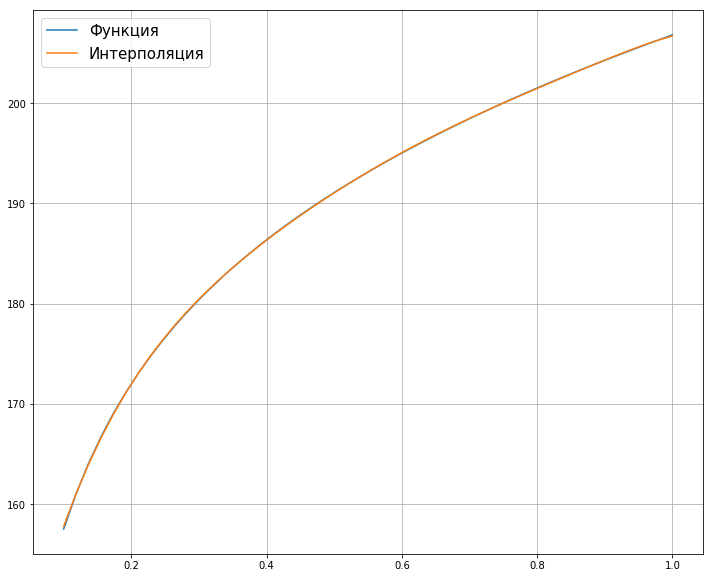

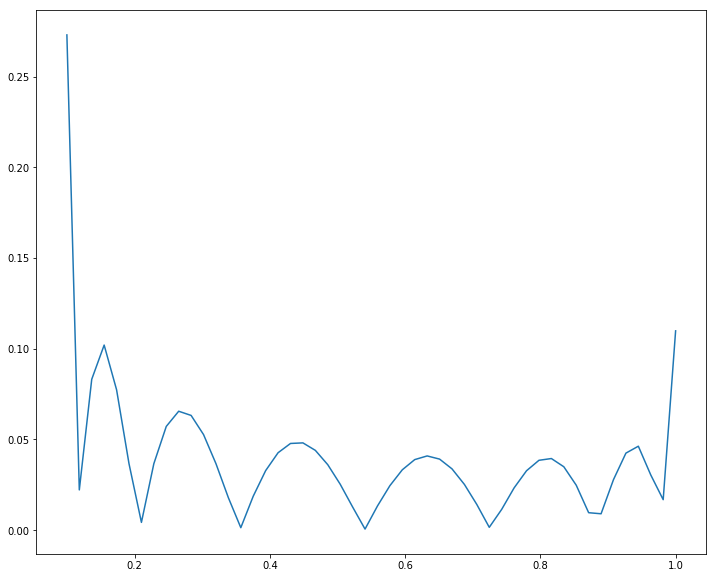

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integral

left = 0.1
right = 1

def ScalarProduct(f, g):
    func = lambda x: f(x) * g(x)
    return integral.quad(func, left, right)[0]

def Norma(f, g):
    func = lambda x: f(x) - g(x)
    return ScalarProduct(func, func) ** (1/2) 
        
def SumFunctions(g):
    def func(x):
        res = 0
        for i in range(g.shape[0]):
            res += g[i](x)
        return res
    return func

a = np.array([198.22, 14.05, 0.039, -1.33, 10.33, -0.125, -0.337])
a = np.transpose(a)
f0 = lambda x: 1
f1 = lambda x: np.log(x)
f2 = lambda x: x**(-2)
f3 = lambda x: x**(-1)
f4 = lambda x: x
f5 = lambda x: x**2
f6 = lambda x: x**3
f = np.array([f0, f1, f2, f3, f4, f5, f6])
#----------------------------------------
n = 7 #степень многочлена интерполяции 
g = np.array([lambda x, i=i: x**i for i in range(n + 1)])
g = np.delete(g, 5)  #удаляем x**5
#--------------------------------------------
G = np.eye(g.shape[0])  #матрица грамма 
for i in range(G.shape[0]):
    for j in range(G.shape[1]):
        G[i][j] = ScalarProduct(g[i], g[j])
F = np.eye(g.shape[0], f.shape[0])
for i in range(F.shape[0]):
    for j in range(F.shape[1]):
        F[i][j] = ScalarProduct(g[i], f[j])
#-------------------------------------------
#решаем систему 
b = np.linalg.solve(G, F @ a)
temp_g = g.copy()
for i in range(g.shape[0]):
    g[i] = lambda x, i=i: b[i] * temp_g[i](x)
our_f = np.array([lambda x, i=i: f[i](x) * a[i] for i in range(f.shape[0])])
print("b =", b, "при степени многочлена интерполяции: n = {}".format(n))
interpolate = SumFunctions(g)
function = SumFunctions(our_f)
grid = np.linspace(left, right)
plt.figure(figsize=(12, 10))
plt.plot(grid, function(grid), label="Функция")
plt.plot(grid, interpolate(grid), label="Интерполяция")
plt.legend(fontsize=15)
plt.grid()
print("Норма в L2: {}".format(Norma(function, interpolate)))
plt.figure(figsize=(12, 10))
plt.plot(grid, np.abs(function(grid) - interpolate(grid)))

In [116]:
A = np.eye(4)
print(A.shape)
A[0] = np.ones(4)
A[1, 1:] = np.array([1, 2, 3])
A[2, 1:] = np.array([1/2, 2, 9/2])
A[3, 1:] = np.array([1/6, 4/3, 27/6])

print(A)
a = np.array([0, 0, 1, 0])
b = np.linalg.solve(A, a)
print(b)
A = np.vstack((A, np.array([0, 1/24, 16/24, 81/24])))
print(A @ b)

(4, 4)
[[1.         1.         1.         1.        ]
 [0.         1.         2.         3.        ]
 [0.         0.5        2.         4.5       ]
 [0.         0.16666667 1.33333333 4.5       ]]
[ 2. -5.  4. -1.]
[ 0.00000000e+00  0.00000000e+00  1.00000000e+00 -2.22044605e-16
 -9.16666667e-01]
